In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\tech mahindra\Vehical_data.csv")

In [5]:
df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [53]:
df.tail()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [54]:
df.shape

(15420, 33)

In [55]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [56]:
# finding the missing value
df.isnull().sum()/df.shape[0]*100

Month                   0.0
WeekOfMonth             0.0
DayOfWeek               0.0
Make                    0.0
AccidentArea            0.0
DayOfWeekClaimed        0.0
MonthClaimed            0.0
WeekOfMonthClaimed      0.0
Sex                     0.0
MaritalStatus           0.0
Age                     0.0
Fault                   0.0
PolicyType              0.0
VehicleCategory         0.0
VehiclePrice            0.0
FraudFound_P            0.0
PolicyNumber            0.0
RepNumber               0.0
Deductible              0.0
DriverRating            0.0
Days_Policy_Accident    0.0
Days_Policy_Claim       0.0
PastNumberOfClaims      0.0
AgeOfVehicle            0.0
AgeOfPolicyHolder       0.0
PoliceReportFiled       0.0
WitnessPresent          0.0
AgentType               0.0
NumberOfSuppliments     0.0
AddressChange_Claim     0.0
NumberOfCars            0.0
Year                    0.0
BasePolicy              0.0
dtype: float64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  object 
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  object 
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  object 
 6   MonthClaimed          15420 non-null  object 
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15420 non-null  int64  
 11  Fault                 0 non-null      float64
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15420 non-null  object 
 14  VehiclePrice          15420 non-null  object 
 15  FraudFound_P       

In [60]:
df['Fault']=pd.to_numeric(df['Fault'],errors='coerce')

In [61]:
#finding duplicates 
df.duplicated().sum()

0

In [62]:
#identifying count of value in each column 
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)
    

Month
Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: count, dtype: int64
******************************
DayOfWeek
Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: count, dtype: int64
******************************
Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: count, dtype: int64
******************************
AccidentArea
Urban    13822
Rural     1598
Name: count, dtype: int64
******************************
DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday 

In [63]:
#EXPLORATORY DATA ANALYSIS(EDA)
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [64]:
#descriptive statistics
df.describe(include="object")

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,PolicyType,VehicleCategory,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,9,3,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Sedan - Collision,Sedan,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,5584,9671,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


In [65]:
import seaborn as sns

FraudFound_P
0    14497
1      923
Name: count, dtype: int64


<Axes: xlabel='FraudFound_P', ylabel='count'>

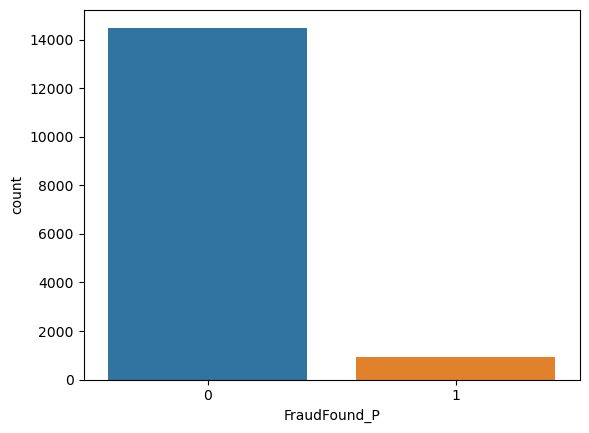

In [66]:
print (df['FraudFound_P'].value_counts())
sns.countplot(x='FraudFound_P',data=df)

In [67]:
df['AccidentArea'].value_counts()

AccidentArea
Urban    13822
Rural     1598
Name: count, dtype: int64

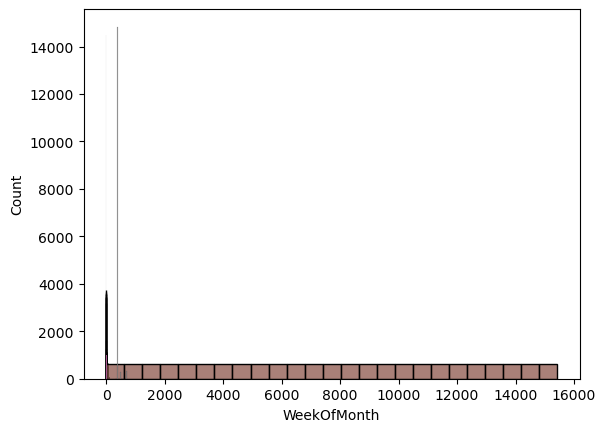

In [68]:
 #histogram to understand the distribution
import warnings 
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
plt.show()

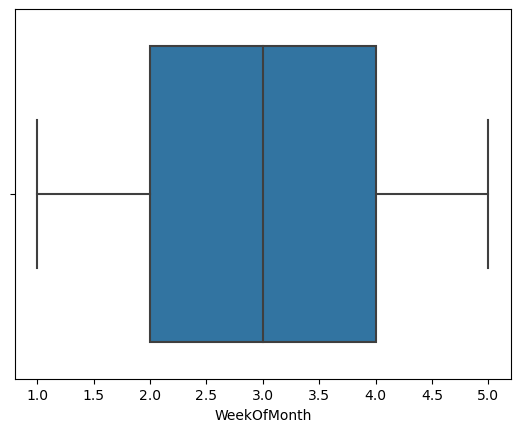

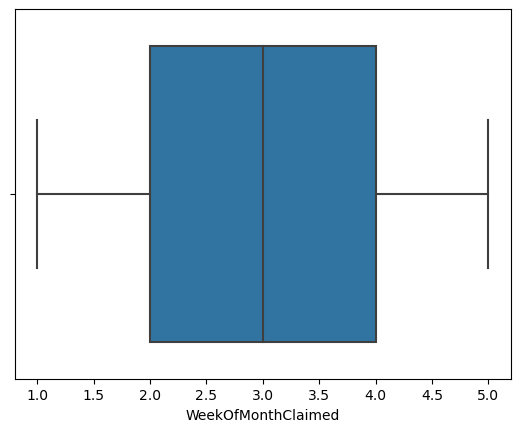

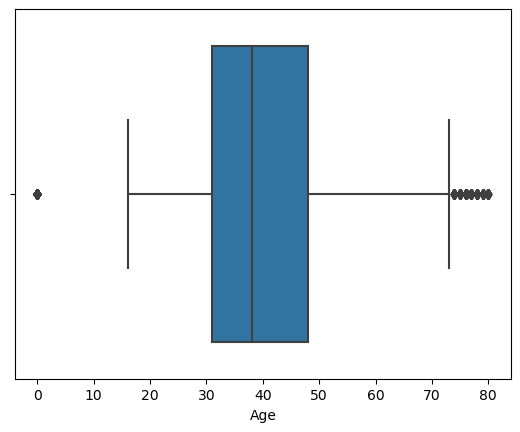

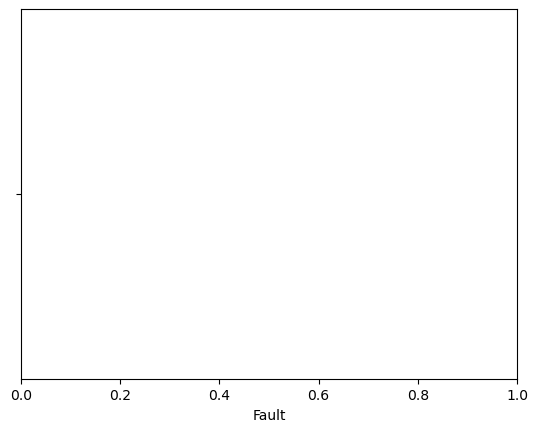

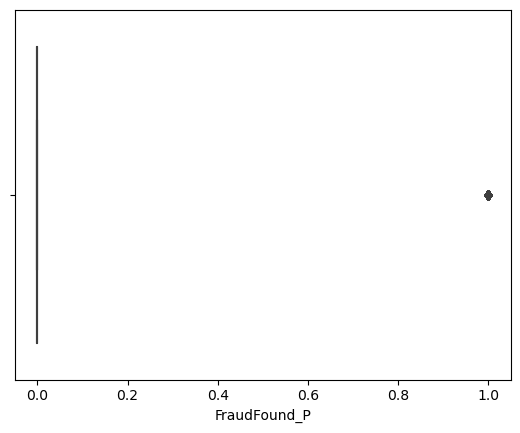

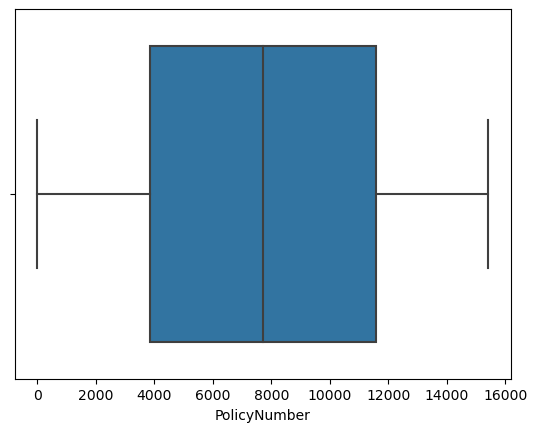

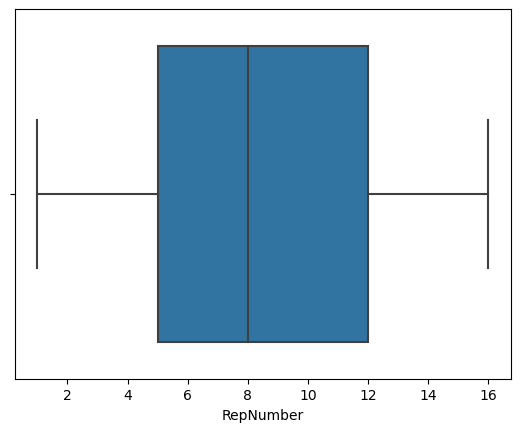

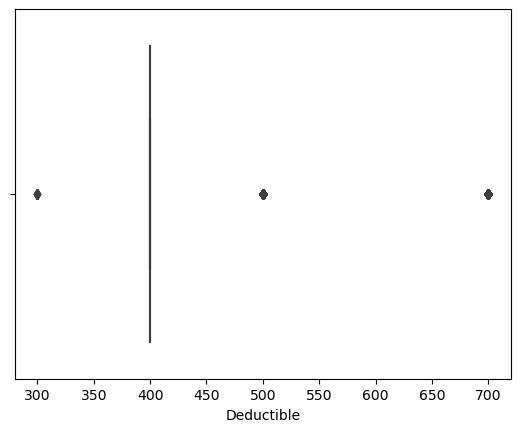

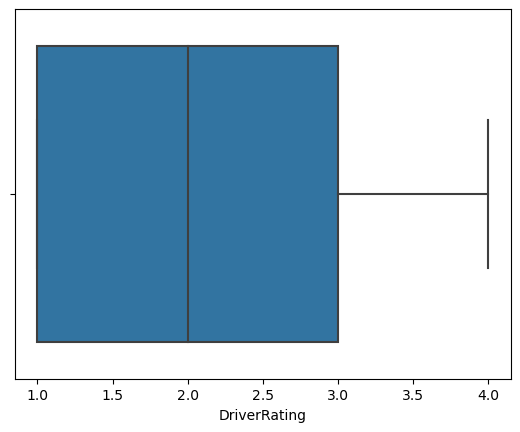

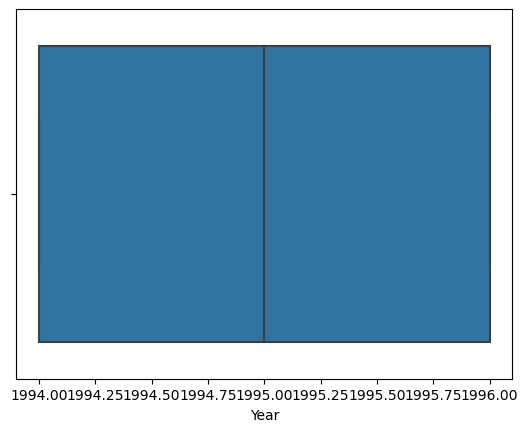

In [69]:
#Boxplot-to-identify outliers
import warnings 
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

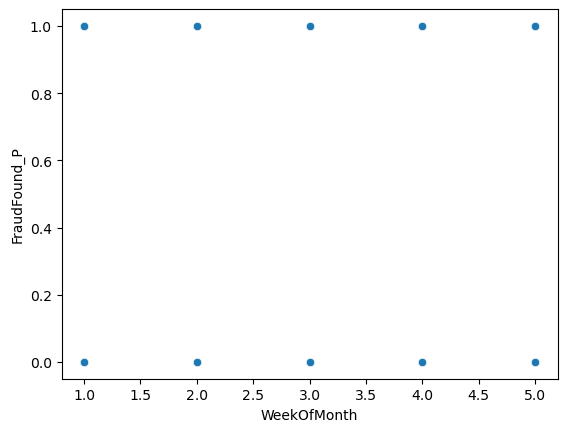

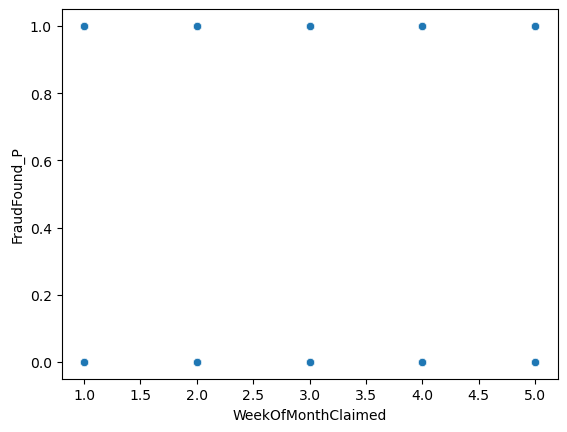

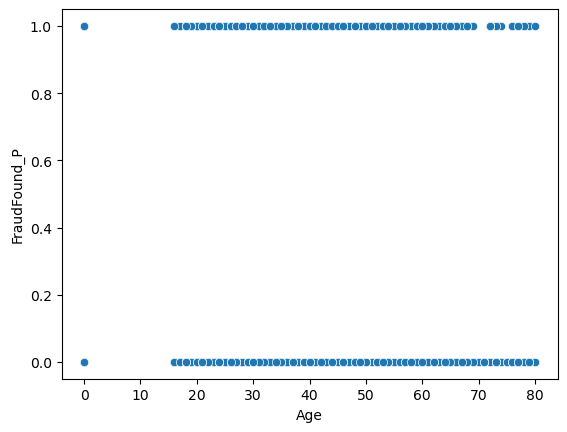

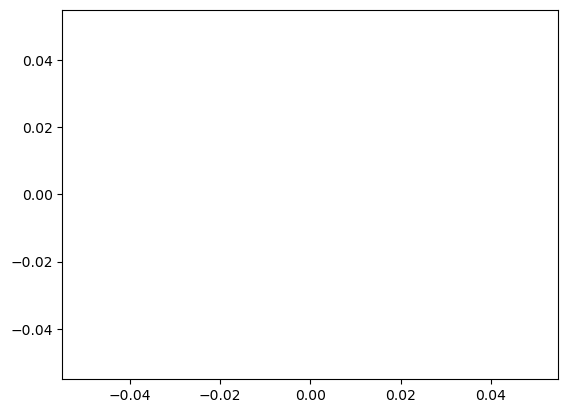

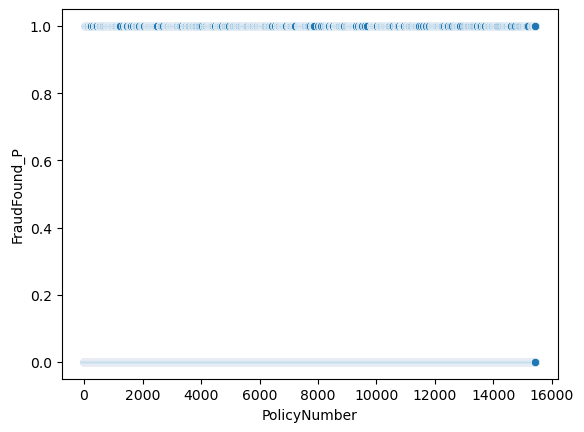

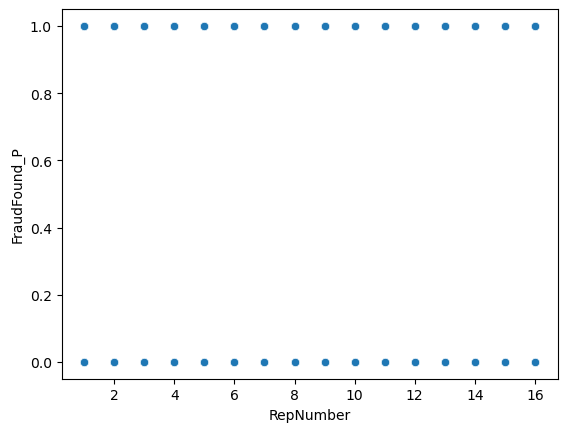

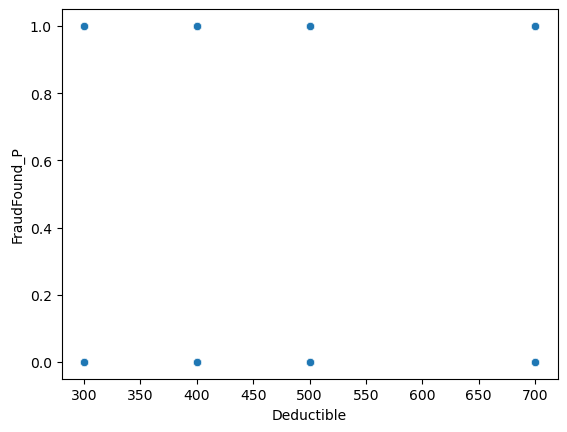

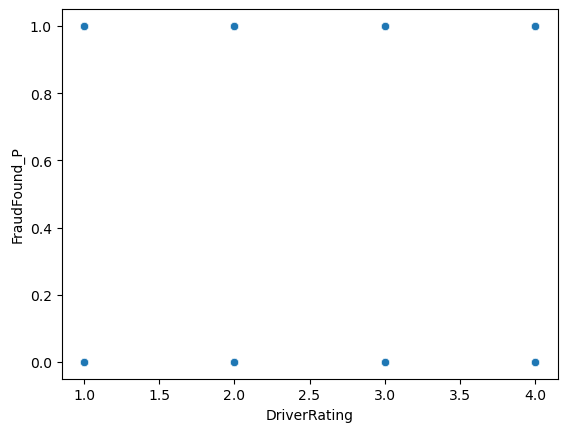

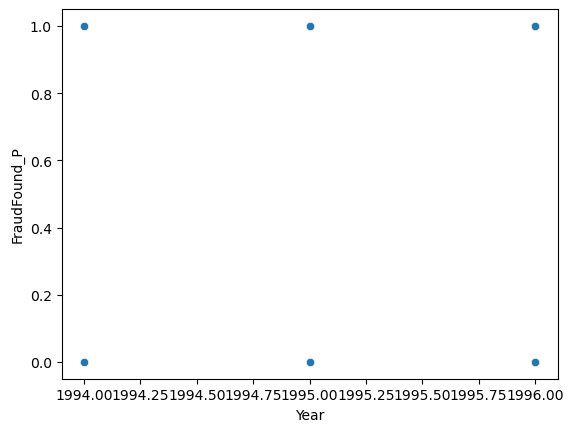

In [70]:
#scatter plot to understand relatinship between idependent
# & target variable 
for i in['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'Fault',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']:
    sns.scatterplot(data=df,x=i,y='FraudFound_P')
    plt.show()

In [71]:
df.select_dtypes(include="number").columns

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'Fault', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [72]:
#correlation with heatmap to interpret the relation and multicolliniarity
s= df.select_dtypes(include="number").corr()

<Axes: >

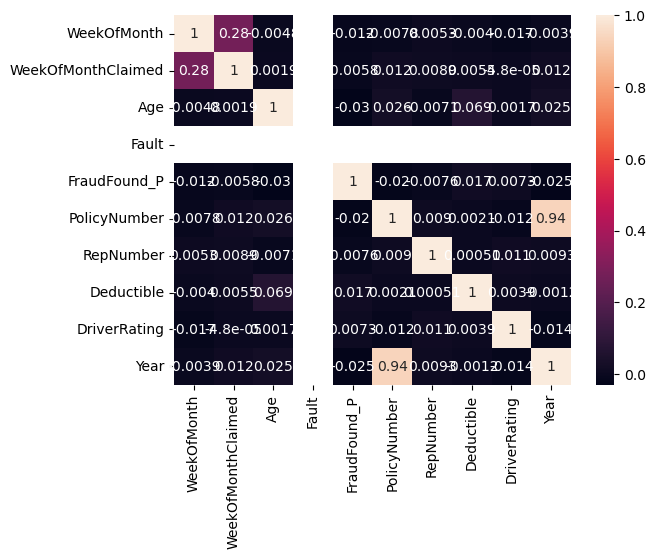

In [73]:
sns.heatmap(s,annot=True)

<Axes: >

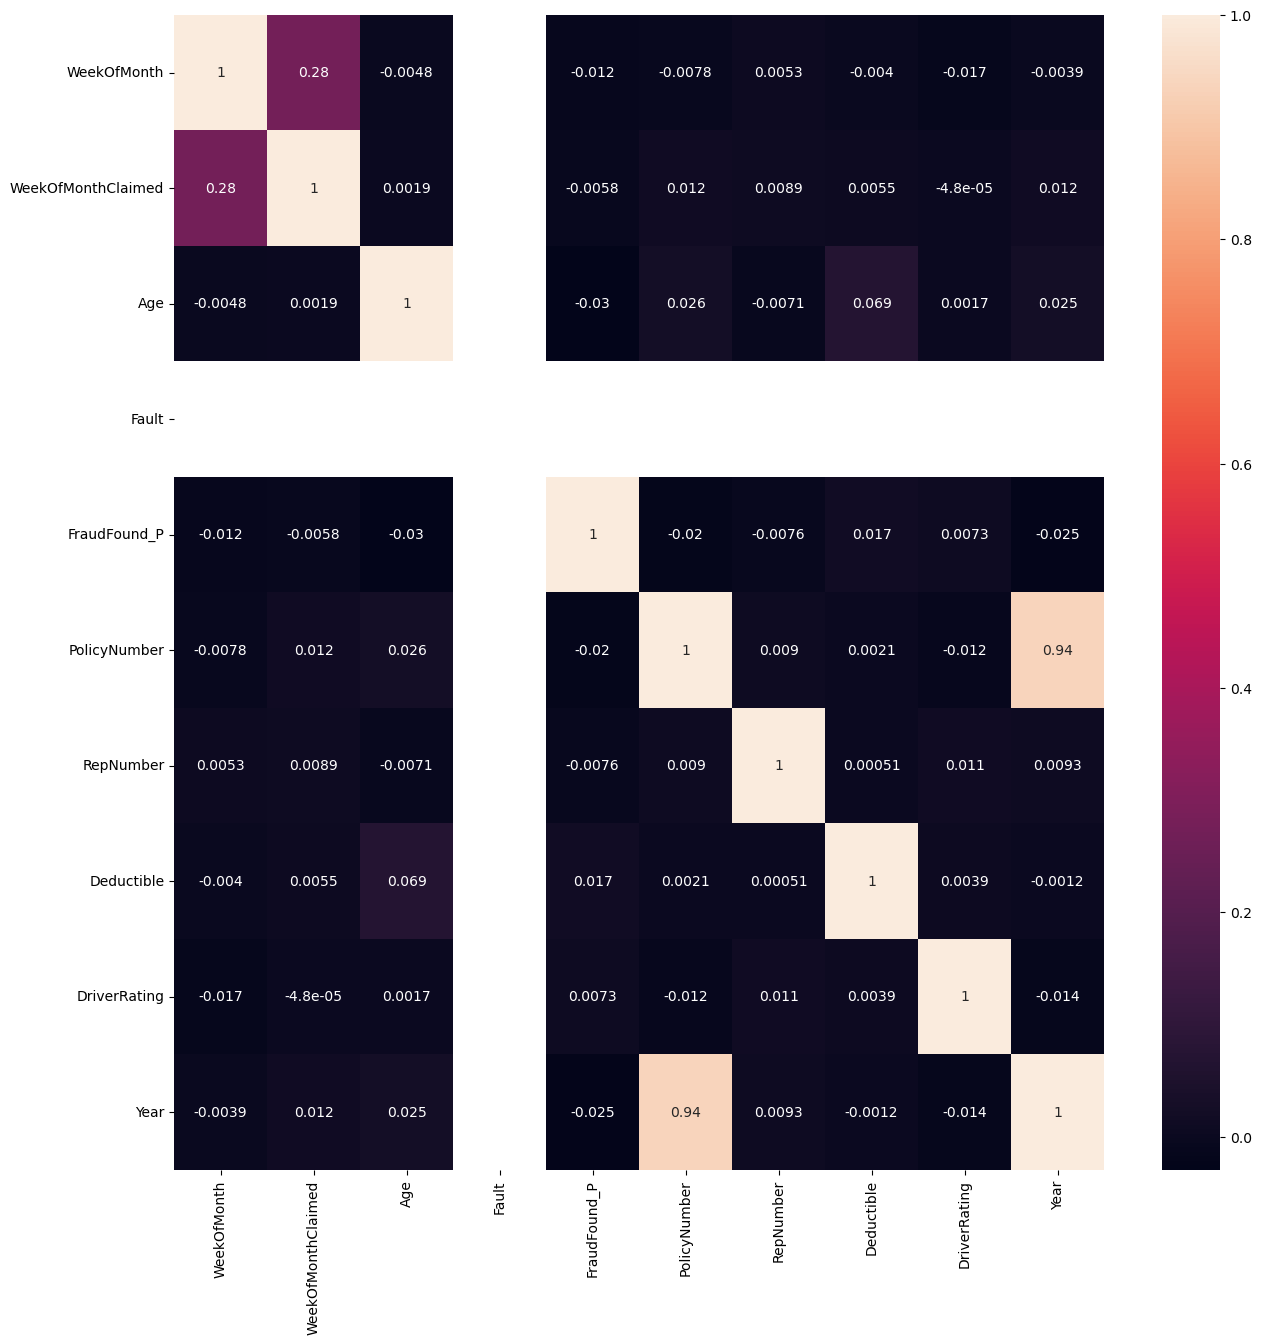

In [74]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

In [75]:
df['AccidentArea'].value_counts()

AccidentArea
Urban    13822
Rural     1598
Name: count, dtype: int64

<Axes: xlabel='AccidentArea', ylabel='count'>

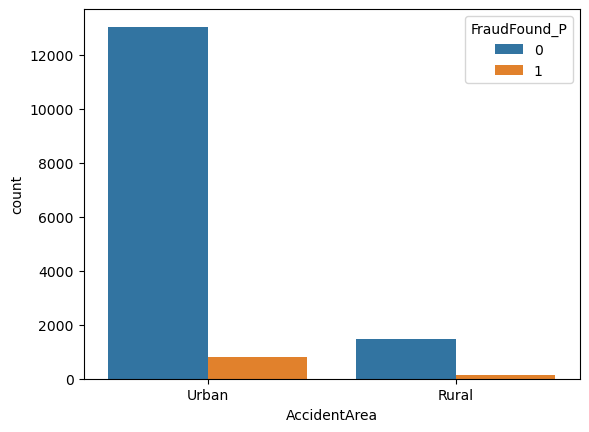

In [76]:
#Bivariant analysis
sns.countplot(x='AccidentArea',data=df,hue='FraudFound_P')

<Axes: xlabel='BasePolicy', ylabel='count'>

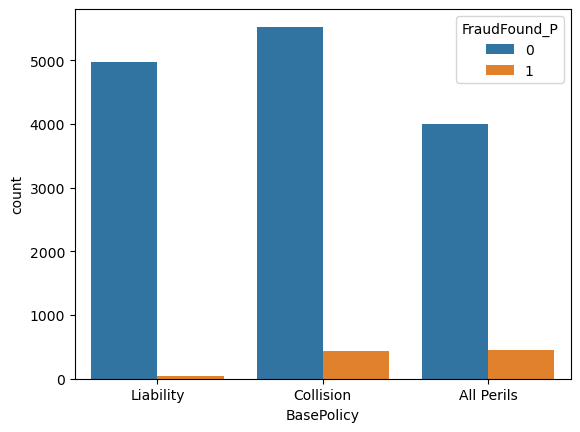

In [77]:
sns.countplot(x='BasePolicy',data=df,hue='FraudFound_P')

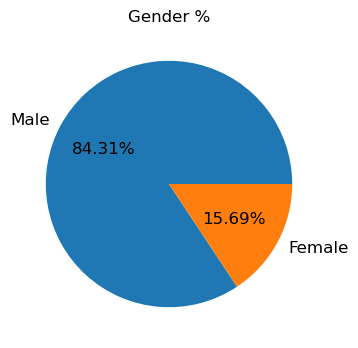

In [78]:
fig = plt.figure(figsize=(6, 4))
ax = (df['Sex'].value_counts() * 100.0 / len(df)).plot.pie( autopct='%.2f%%', labels=['Male', 'Female'], fontsize=12)
ax.set_title('Gender %')
ax.set(ylabel='')
plt.show()

Marital Status Counts:
MaritalStatus
Married     10625
Single       4684
Divorced       76
Widow          35
Name: count, dtype: int64


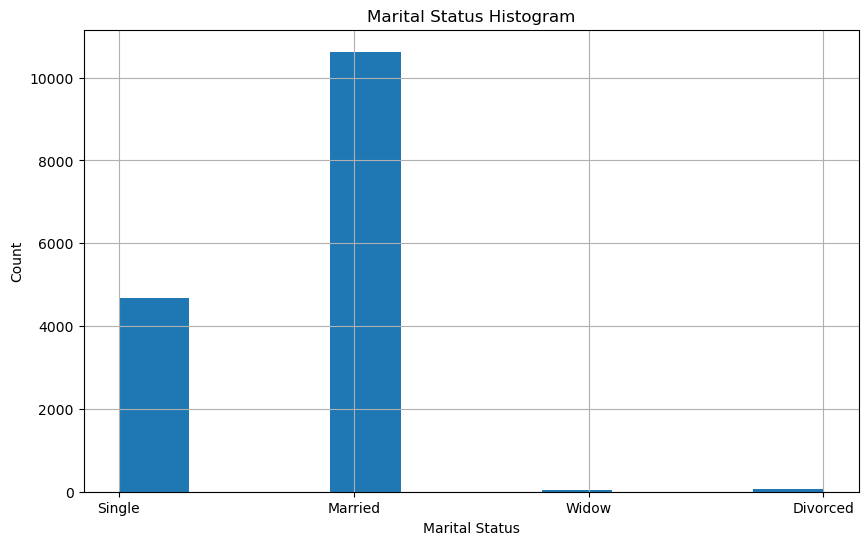

In [79]:
marital_status_counts = df['MaritalStatus'].value_counts()
print("Marital Status Counts:")
print(marital_status_counts)

fig, ax = plt.subplots(figsize=(10, 6))
df['MaritalStatus'].hist(ax=ax)
ax.set_title('Marital Status Histogram')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
plt.show()

In [80]:
# Convert the column to a specific numeric type
data = {'month': ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']}
df = pd.DataFrame(data)
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['month'] = df['month'].map(month_mapping)
df['month'] = df['month'].astype(int)
print(df)
print(df.dtypes)

    month
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     11
11     12
month    int32
dtype: object


In [81]:
df.head()

,month
0,1
1,2
2,3
3,4
4,5


In [85]:
df.isna().sum()

month    0
dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
# Check for missing values
missing_values = df.isna().sum()
print(missing_values)

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
Month_Number            0
DayOfWeek_Number        0
Full_Date               0
dtype: int64


In [87]:
data = {
    'marital_status': ['Single', 'Married', 'Divorced', 'Widowed', 'Single', 'Married']
}

df = pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\tech mahindra\Vehical_data.csv")

# Map marital status to their corresponding numeric values
marital_status_mapping = {
    'Single': 1, 'Married': 2, 'Divorced': 3, 'Widowed': 4
}

df['marital_status_numeric'] = df['MaritalStatus'].map(marital_status_mapping)
print(df)

      Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  .

In [115]:
# Convert the column to a specific numeric type
data = {'month': ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']}
df = pd.DataFrame(data)
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['month'] = df['month'].map(month_mapping)
df['month'] = df['month'].astype(int)
print(df)
print(df.dtypes)

    month
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     11
11     12
month    int32
dtype: object


In [15]:
from datetime import datetime, timedelta
import calendar
# Mapping full month names to numbers

month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Mapping day of the week to numbers
day_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

# Convert the mapped values
df['Month_Number'] = df['Month'].map(month_mapping)
df['DayOfWeek_Number'] = df['DayOfWeek'].map(day_mapping)

# Function to compute the full date
def compute_full_date(row):
    year = row['Year']
    month = row['Month_Number']
    week_of_month = row['WeekOfMonth']
    day_of_week = row['DayOfWeek_Number']
    
    # Find the first day of the month
    first_day_of_month = datetime(year, month, 1)
# Find the first occurrence of the specified day in the month
    first_occurrence_of_day = first_day_of_month + timedelta(days=(day_of_week - first_day_of_month.weekday() + 7) % 7)
    
    # Compute the full date by adding the required weeks
    full_date = first_occurrence_of_day + timedelta(weeks=week_of_month - 1)
    
    return full_date

# Apply the function to each row
df['Full_Date'] = df.apply(compute_full_date, axis=1)

# Display the DataFrame
df['Full_Date']

0       1995-01-04
1       1994-01-19
2       1994-11-04
3       1994-06-11
4       1994-01-31
           ...    
15415   1996-11-22
15416   1996-12-05
15417   1996-12-05
15418   1996-12-02
15419   1996-12-11
Name: Full_Date, Length: 15420, dtype: datetime64[ns]

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
#converting object type into numerics
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['PolicyType'] = le.fit_transform(df['PolicyType'])
df['DriverRating'] = le.fit_transform(df['DriverRating'])
df['BasePolicy'] = le.fit_transform(df['BasePolicy'])
df['AccidentArea'] = le.fit_transform(df['AccidentArea'])
df['Fault'] = le.fit_transform(df['Fault'])
df['VehicleCategory'] = le.fit_transform(df['VehicleCategory'])
df['Days_Policy_Accident'] = le.fit_transform(df['Days_Policy_Accident'])
df['Days_Policy_Claim'] = le.fit_transform(df['Days_Policy_Claim'])
df['PoliceReportFiled'] = le.fit_transform(df['PoliceReportFiled'])
df['WitnessPresent'] = le.fit_transform(df['WitnessPresent'])
df['AgentType'] = le.fit_transform(df['AgentType'])
df['DayOfWeek'] = le.fit_transform(df['DayOfWeek'])
df['Make'] = le.fit_transform(df['Make'])
df['DayOfWeekClaimed'] = le.fit_transform(df['DayOfWeekClaimed'])
df['MonthClaimed'] = le.fit_transform(df['MonthClaimed'])
df['PastNumberOfClaims'] = le.fit_transform(df['PastNumberOfClaims'])
df['AgeOfVehicle'] = le.fit_transform(df['AgeOfVehicle'])
df['NumberOfSuppliments'] = le.fit_transform(df['NumberOfSuppliments'])
df['AddressChange_Claim'] = le.fit_transform(df['AddressChange_Claim'])
df['NumberOfCars'] = le.fit_transform(df['NumberOfCars'])

In [34]:
df.Full_Date

0       1995-01-04
1       1994-01-19
2       1994-11-04
3       1994-06-11
4       1994-01-31
           ...    
15415   1996-11-22
15416   1996-12-05
15417   1996-12-05
15418   1996-12-02
15419   1996-12-11
Name: Full_Date, Length: 15420, dtype: datetime64[ns]

In [38]:
columns_to_drop = ['Month', 'WeekOfMonth','DayOfWeek','DayOfWeekClaimed']
df = df.drop(columns=columns_to_drop)
df

,Make,AccidentArea,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Month_Number,DayOfWeek_Number,Full_Date
0,6,1,5,1,Female,2,21,0,5,1,...,0,0,3,0,2,1994,2,12,2,1995-01-04
1,6,1,5,4,Male,2,34,0,4,1,...,0,0,3,3,0,1994,1,1,2,1994-01-19
2,6,1,10,2,Male,1,47,0,4,1,...,0,0,3,3,0,1994,1,10,4,1994-11-04
3,17,0,6,1,Male,1,65,1,2,1,...,0,0,2,3,0,1994,2,6,5,1994-06-11
4,6,1,4,2,Female,2,27,1,4,1,...,0,0,3,3,0,1994,1,1,0,1994-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,17,1,10,5,Male,1,35,0,1,0,...,0,0,3,3,0,1996,1,11,4,1996-11-22
15416,13,1,3,1,Male,1,30,0,2,1,...,0,0,2,3,2,1996,2,11,3,1996-12-05
15417,17,0,3,1,Male,2,24,0,1,0,...,0,0,0,3,0,1996,1,11,3,1996-12-05
15418,17,1,3,2,Female,1,34,1,0,0,...,0,0,2,3,0,1996,0,12,0,1996-12-02


In [18]:
df.head(3)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Month_Number,DayOfWeek_Number,Full_Date
0,Dec,5,6,6,1,6,5,1,Female,2,...,0,0,3,0,2,1994,2,12,2,1995-01-04
1,Jan,3,6,6,1,2,5,4,Male,2,...,0,0,3,3,0,1994,1,1,2,1994-01-19
2,Oct,5,0,6,1,5,10,2,Male,1,...,0,0,3,3,0,1994,1,10,4,1994-11-04


In [20]:
df.sample()
df.dtypes

Month                           object
WeekOfMonth                      int64
DayOfWeek                        int64
Make                             int64
AccidentArea                     int64
DayOfWeekClaimed                 int64
MonthClaimed                     int64
WeekOfMonthClaimed               int64
Sex                             object
MaritalStatus                    int64
Age                              int64
Fault                            int64
PolicyType                       int64
VehicleCategory                  int64
VehiclePrice                    object
FraudFound_P                     int64
PolicyNumber                     int64
RepNumber                        int64
Deductible                       int64
DriverRating                     int64
Days_Policy_Accident             int64
Days_Policy_Claim                int64
PastNumberOfClaims               int64
AgeOfVehicle                     int64
AgeOfPolicyHolder               object
PoliceReportFiled        

In [40]:
#converting object type into numerics
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = df[column].fillna('Missing')
    df[column] = label_encoders[column].fit_transform(df[column])
df

,Make,AccidentArea,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Month_Number,DayOfWeek_Number,Full_Date
0,6,1,5,1,0,2,21,0,5,1,...,0,0,3,0,2,1994,2,12,2,1995-01-04
1,6,1,5,4,1,2,34,0,4,1,...,0,0,3,3,0,1994,1,1,2,1994-01-19
2,6,1,10,2,1,1,47,0,4,1,...,0,0,3,3,0,1994,1,10,4,1994-11-04
3,17,0,6,1,1,1,65,1,2,1,...,0,0,2,3,0,1994,2,6,5,1994-06-11
4,6,1,4,2,0,2,27,1,4,1,...,0,0,3,3,0,1994,1,1,0,1994-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,17,1,10,5,1,1,35,0,1,0,...,0,0,3,3,0,1996,1,11,4,1996-11-22
15416,13,1,3,1,1,1,30,0,2,1,...,0,0,2,3,2,1996,2,11,3,1996-12-05
15417,17,0,3,1,1,2,24,0,1,0,...,0,0,0,3,0,1996,1,11,3,1996-12-05
15418,17,1,3,2,0,1,34,1,0,0,...,0,0,2,3,0,1996,0,12,0,1996-12-02


In [ ]:
make 
AccidentArea
Sex
MaritalStatus
Fault
PolicyType
VehicleCategory
PastNumberOfClaims
AgentType
NumberOfSuppliments
AddressChange_Claim
BasePolicy

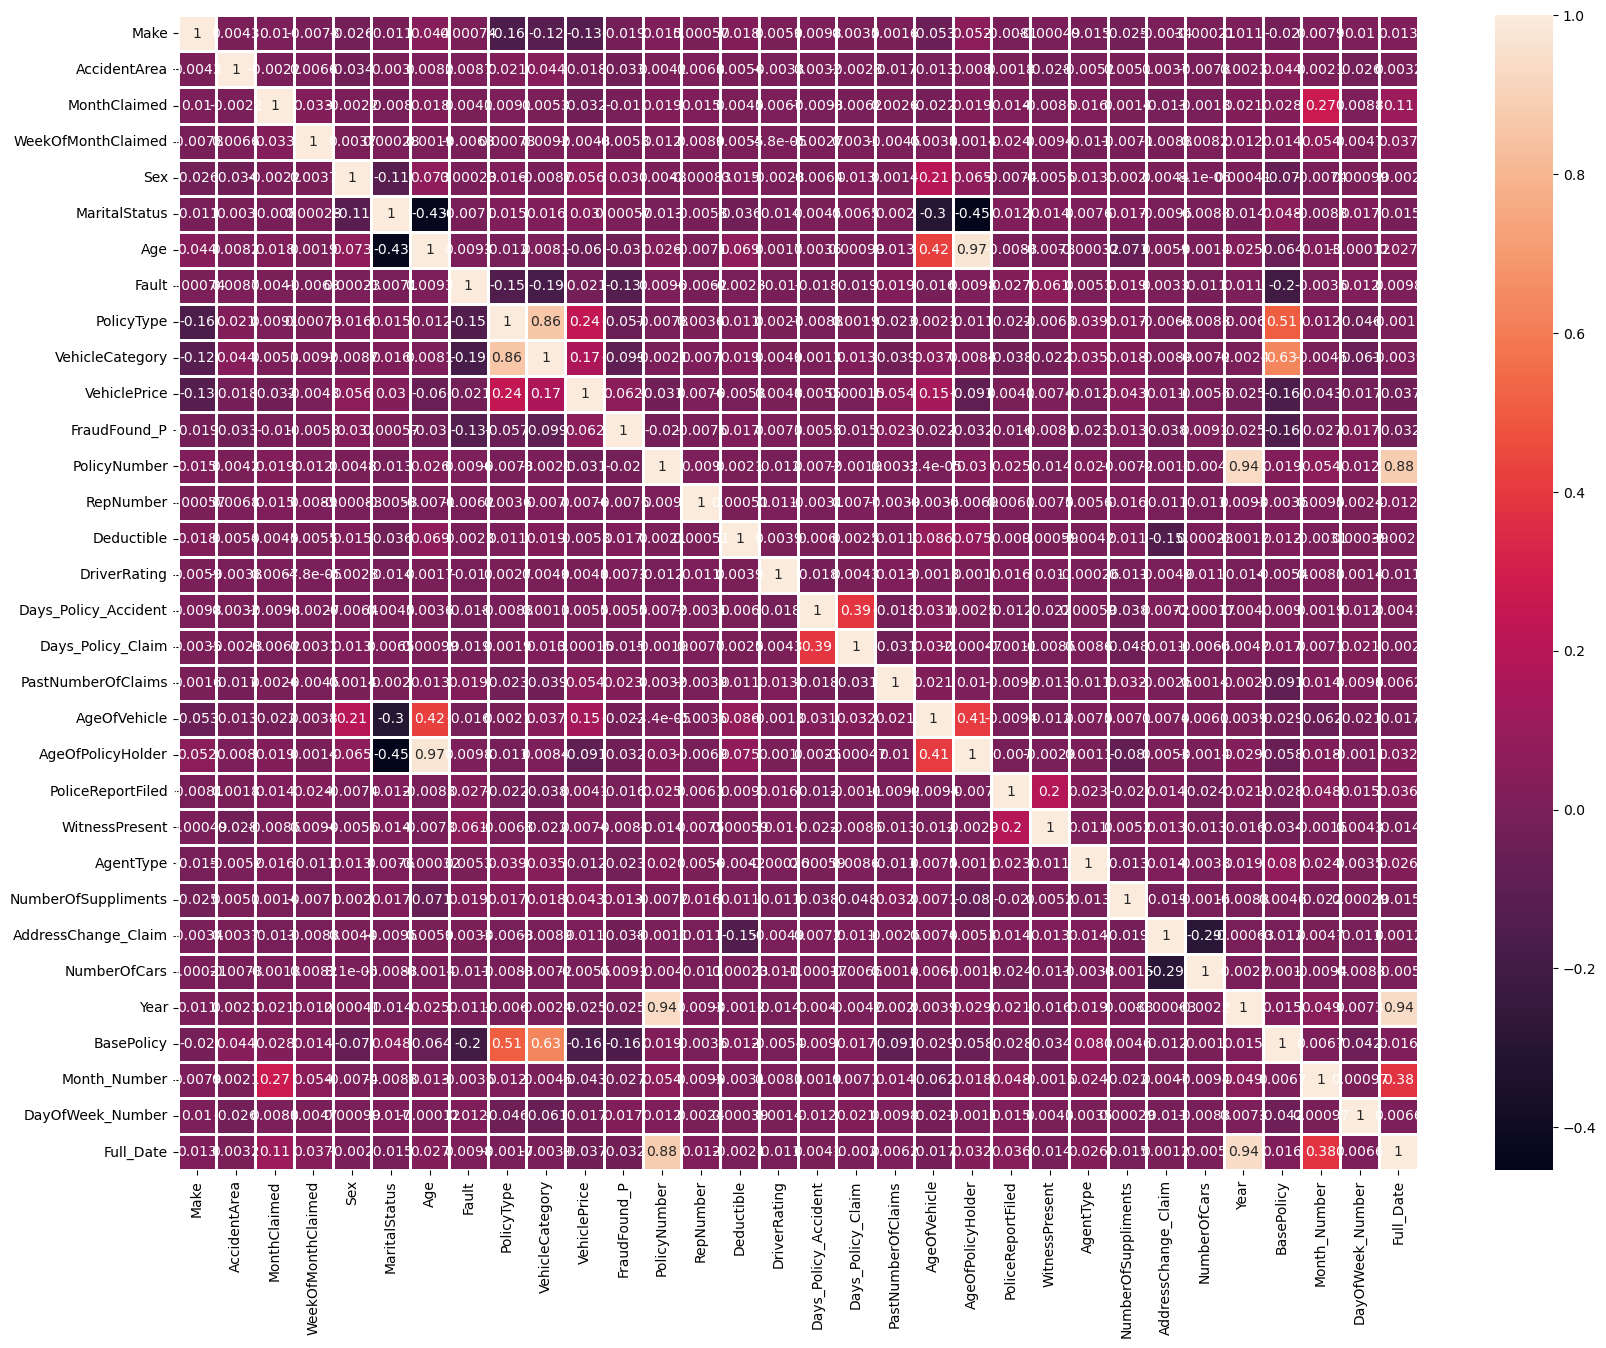

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
sns.heatmap(data=df.corr(), annot=True, fmt='.2g', linewidths=1)
plt.show()

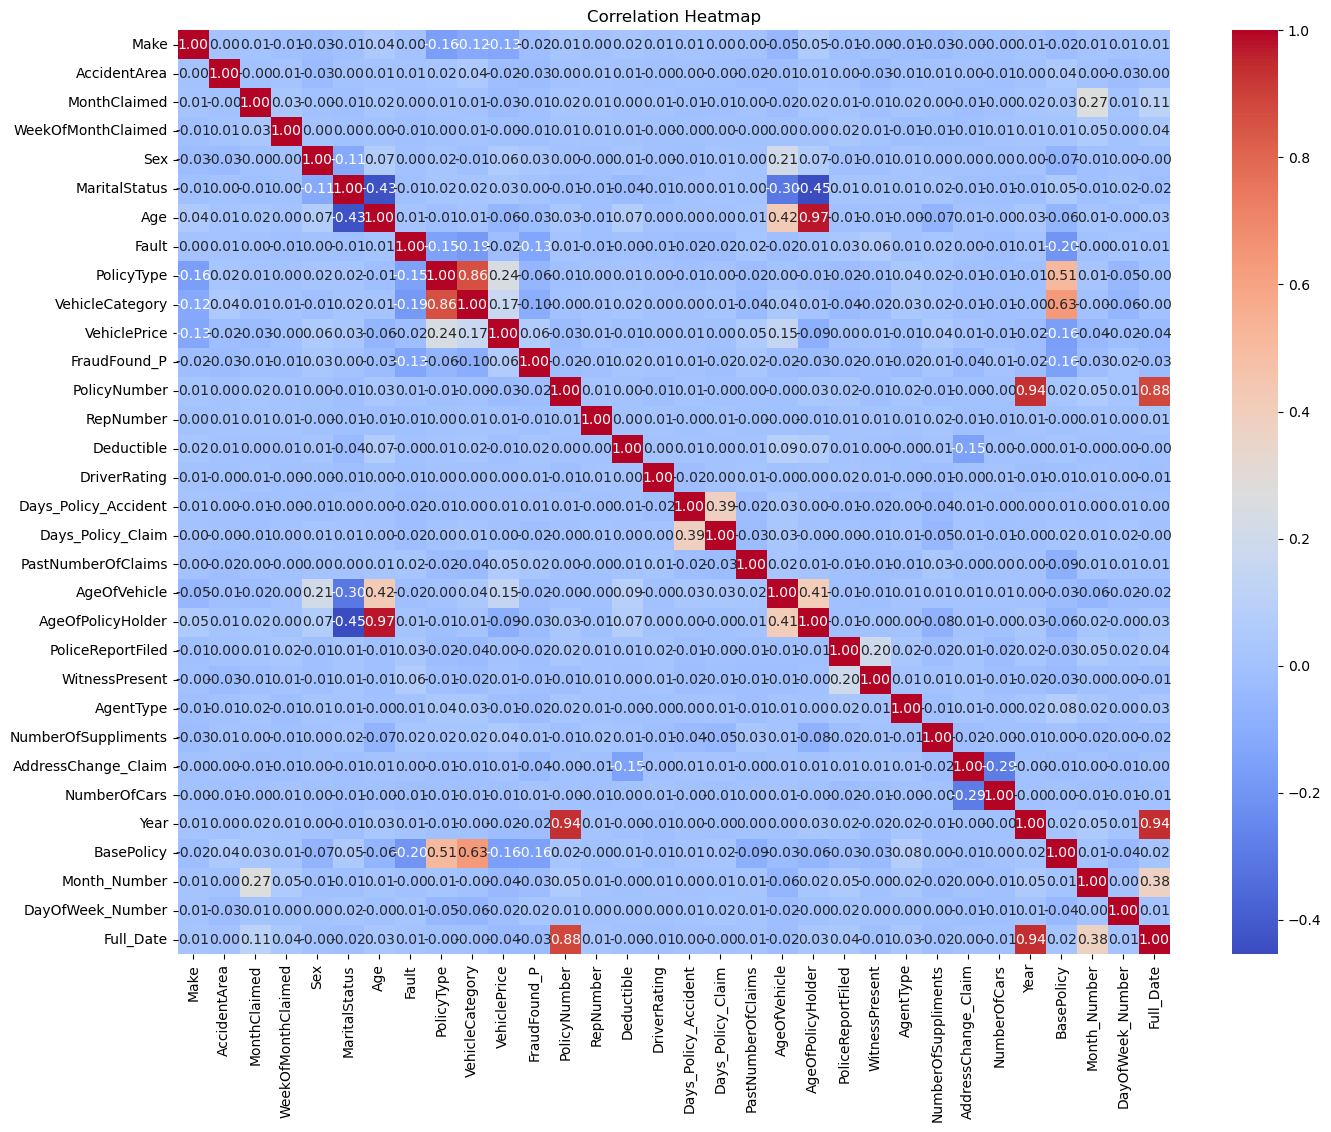

In [43]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [21]:
df.shape

(15420, 36)

In [44]:
correlation_matrix = df.corr()
correlation_matrix

,Make,AccidentArea,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Month_Number,DayOfWeek_Number,Full_Date
Make,1.000000,0.004274,0.010118,-0.007832,-0.026381,-0.010647,0.043515,0.000741,-0.161299,-0.117638,...,-0.000487,-0.014907,-0.025212,-0.003402,-0.000212,0.010880,-0.019868,0.007861,0.010181,0.012602
AccidentArea,0.004274,1.000000,-0.002248,0.006584,-0.033804,0.003040,0.008223,0.008713,0.020992,0.043950,...,-0.028362,-0.005189,0.005056,0.003706,-0.007805,0.002284,0.043798,0.002140,-0.025699,0.003157
MonthClaimed,0.010118,-0.002248,1.000000,0.032591,-0.002214,-0.007955,0.017844,0.004100,0.009081,0.005303,...,-0.008587,0.016161,0.001370,-0.013402,-0.001779,0.021079,0.028323,0.272590,0.008810,0.110685
WeekOfMonthClaimed,-0.007832,0.006584,0.032591,1.000000,0.003739,0.000283,0.001859,-0.006337,0.000733,0.009179,...,0.009369,-0.011314,-0.007100,-0.008343,0.008246,0.012175,0.013785,0.053917,0.004716,0.037432
Sex,-0.026381,-0.033804,-0.002214,0.003739,1.000000,-0.114391,0.073113,0.000230,0.016128,-0.008733,...,-0.005585,0.012681,0.001952,0.004435,0.000081,0.000413,-0.069761,-0.007397,0.000990,-0.002030
MaritalStatus,-0.010647,0.003040,-0.007955,0.000283,-0.114391,1.000000,-0.434759,-0.007097,0.015443,0.016287,...,0.013862,0.007579,0.016742,-0.009533,-0.008308,-0.013994,0.047999,-0.008818,0.016957,-0.015266
Age,0.043515,0.008223,0.017844,0.001859,0.073113,-0.434759,1.000000,0.009310,-0.012060,0.008090,...,-0.007280,-0.000319,-0.070985,0.005903,-0.001405,0.025197,-0.064132,0.012778,-0.000115,0.027390
Fault,0.000741,0.008713,0.004100,-0.006337,0.000230,-0.007097,0.009310,1.000000,-0.152894,-0.185973,...,0.061036,0.005306,0.019279,0.003263,-0.011066,0.011158,-0.200722,-0.003619,0.011941,0.009765
PolicyType,-0.161299,0.020992,0.009081,0.000733,0.016128,0.015443,-0.012060,-0.152894,1.000000,0.862276,...,-0.006307,0.039154,0.017427,-0.006756,-0.008266,-0.005989,0.510542,0.012336,-0.046211,-0.001706
VehicleCategory,-0.117638,0.043950,0.005303,0.009179,-0.008733,0.016287,0.008090,-0.185973,0.862276,1.000000,...,-0.021920,0.034968,0.018021,-0.008944,-0.007166,-0.002418,0.631512,-0.004506,-0.061181,-0.003930


In [25]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Month_Number', 'DayOfWeek_Number', 'Full_Date'],
      dtype='object')

In [71]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (Y)
X = df.drop(columns=['FraudFound_P','Full_Date','Sex','VehiclePrice','AgeOfPolicyHolder'])
Y = df['FraudFound_P']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [55]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [53]:
#for imbalance data
import sklearn
from imblearn.over_sampling import SMOTE
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y,random_state = 1,stratify = Y)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [52]:
Y_train.value_counts()

FraudFound_P
0    10156
1      638
Name: count, dtype: int64

In [ ]:
#creating object to smote class for 50-50
smt = SMOTE()
x_train,y_train = smt.fit_resample(x_train, y_train)
np.bincount(y_train)

In [ ]:
pip install xgboost

In [72]:
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
#from sklearn.tree import LogisticRegressionCV
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean 
from numpy import std
#getting a stack assemble of models 
'''def get_stacking():
    #define the base models 
    level0 = list()
    level0.append(('DT',DecisionTreeClassifier(max_depth=10, random_state=5)))
    level0.append(('RF',RandomForestClassifier(n_estimators=500)))
    level0.append(('KNN',KNeighborsClassifier(5)))
    level0.append(('XGB',XGBClassifier(objective='binary:logistic',use_label_encoder=False)))
    level1 = LogisticRegression()
    #define the stacking ensemble
    model = stackingClassifier(estimator=level0, final_estimator=level1,cv=10)
    return model'''
def get_stacking():
    
    level0 = [
        ('DT', DecisionTreeClassifier(max_depth=10, random_state=5)),
        ('RF', RandomForestClassifier(n_estimators=500)),
        ('KNN', KNeighborsClassifier(n_neighbors=5)),
        ('XGB', XGBClassifier(objective='binary:logistic', use_label_encoder=False))
    ]
    
  
    level1 = LogisticRegression()
    
  
    model = StackingClassifier(estimators=level0, final_estimator=level1)
    
    return model

#get a list of models to evaluate
def get_models():
    models = dict()
    models['DT'] = DecisionTreeClassifier(max_depth=10)
    models['RF'] = RandomForestClassifier(n_estimators=500)
    models['KNN'] = KNeighborsClassifier(5)
    #models['ADA'] = AdaBoostClassifier(n_estimators=500)
    models['XGB'] = XGBClassifier(objective = 'binary:logistic',eval_metric='logloss',use_label_encoder = False)
    models['stacking'] = get_stacking()
    return models

#get the models to evaluate
models = get_models()
def evaluate_model(model, X, Y):
  
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

#evaluate the model and store results
results, names = list(),list()
for name,model in models.items():
    scores = evaluate_model(model,X_train,Y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.2f (%.2f)' % (name,mean(scores),std(scores)))
    
        

>DT 0.94 (0.00)
>RF 0.94 (0.00)
>KNN nan (nan)
>XGB 0.95 (0.00)


ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py", line 658, in fit
    return super().fit(X, y_encoded, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py", line 249, in fit
    predictions = Parallel(n_jobs=self.n_jobs)(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 65, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\joblib\parallel.py", line 1088, in __call__
    while self.dispatch_one_batch(iterator):
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\anshi\anaconda3\Lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\joblib\_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
             ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\joblib\_parallel_backends.py", line 597, in __init__
    self.results = batch()
                   ^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\joblib\parallel.py", line 288, in __call__
    return [func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\joblib\parallel.py", line 288, in <listcomp>
    return [func(*args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 127, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 1036, in cross_val_predict
    predictions = parallel(
                  ^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 65, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\anshi\anaconda3\Lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\joblib\_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
             ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\joblib\_parallel_backends.py", line 597, in __init__
    self.results = batch()
                   ^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\joblib\parallel.py", line 288, in __call__
    return [func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\joblib\parallel.py", line 288, in <listcomp>
    return [func(*args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 127, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 1120, in _fit_and_predict
    predictions = func(X_test)
                  ^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 316, in predict_proba
    and ArgKminClassMode.is_usable_for(X, self._fit_X, metric)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py", line 471, in is_usable_for
    ArgKmin.is_usable_for(X, Y, metric)
  File "C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py", line 115, in is_usable_for
    and (is_numpy_c_ordered(X) or is_valid_sparse_matrix(X))
         ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py", line 99, in is_numpy_c_ordered
    return hasattr(X, "flags") and X.flags.c_contiguous
                                   ^^^^^^^^^^^^^^^^^^^^
AttributeError: 'Flags' object has no attribute 'c_contiguous'


In [ ]:
plt.boxplot(results,labels = names, showmeans = True)
plt.show()